In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ids = pd.read_csv('first_experiment_labels.csv')
results = pd.read_csv('results.csv')
mrgd = results.merge(ids, how='inner', right_on='id', left_on='gt_id')[['gt_id', 'pred_id', 'sex', 'race', 'age']]
mrgd['correct'] = (mrgd.gt_id==mrgd.pred_id)

In [3]:
def make_age_group(df, group=(20, 40)):
    """Returns a boolean array corresponing to desired age
    range, specified by group touple (upper and lower values).
    """
    lft = np.where(df.age.astype(int)<group[0], True, False)
    group = np.where((df.age.astype(int)<group[1]) & (~lft), True, False)
    lft = np.where(group, True, lft)
    return group

def get_error_rate(df, sex=None, race=None, age_group=[]):
    if not sex and not race and len(age_group)==0:
        sub = df
    elif sex and not race and len(age_group)==0:
        sub = df[df.sex==sex]
    elif race and not sex and len(age_group)==0:
        sub = df[df.race==race]
    elif len(age_group)!=0 and not sex and not race:
        sub = df[age_group]
    elif len(age_group)!=0 and not sex and not race:
        sub = df[age_group]
    elif len(age_group)!=0 and sex and not race:
        sub = df[age_group&(df.sex==sex)]
    elif len(age_group)!=0 and race and not sex:
        sub = df[age_group&(df.race==race)]
    elif race and sex and len(age_group)==0:
        sub = df[(df.sex==sex)&(df.race==race)]
    elif race and sex and len(age_group)!=0:
        sub = df[age_group&(df.race==race)&(df.sex==sex)]
    err = 1 - (len(sub[sub.correct])/len(sub))
    return err

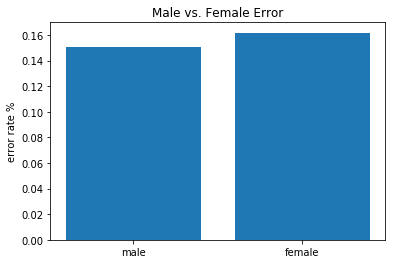

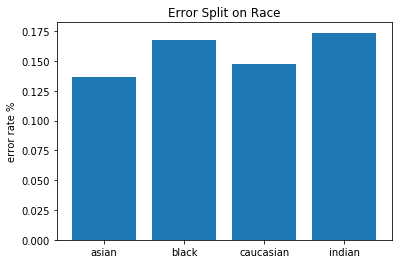

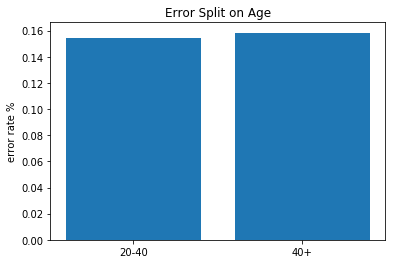

In [4]:
group1 = make_age_group(mrgd, group=(20, 40))
group2 = make_age_group(mrgd, group=(40, 200))

get_error_rate(mrgd, age_group=group2, sex='female', race='black')

def plot_sex_split(df):
    male = get_error_rate(df, sex='male')
    female = get_error_rate(df, sex='female')
    plt.title('Male vs. Female Error')
    plt.bar(['male', 'female'], [male, female])
    plt.ylabel('error rate %')
    plt.show()
    
def plot_race_split(df):
    asn = get_error_rate(df, race='asian')
    blk = get_error_rate(df, race='black')
    ccn = get_error_rate(df, race='caucasian')
    idn = get_error_rate(df, race='indian')
    plt.title('Error Split on Race')
    plt.bar(['asian', 'black', 'caucasian', 'indian'], [asn, blk, ccn, idn])
    plt.ylabel('error rate %')
    plt.show()
    
def plot_age_split(df):
    group1 = make_age_group(mrgd, group=(20, 40))
    e1 = get_error_rate(mrgd, age_group=group1)

    group2 = make_age_group(mrgd, group=(40, 200))
    e2 = get_error_rate(mrgd, age_group=group2)
    plt.title('Error Split on Age')
    plt.bar(['20-40', '40+'], [e1, e2])
    plt.ylabel('error rate %')
    plt.show()
    
plot_sex_split(mrgd)
plot_race_split(mrgd)
plot_age_split(mrgd)

In [6]:
def plot_custom_split(df):
    asn = get_error_rate(df, race='asian')
    blk = get_error_rate(df, race='black')
    ccn = get_error_rate(df, race='caucasian')
    idn = get_error_rate(df, race='indian')
    plt.title('Error Split on Race')
    plt.bar(['asian', 'black', 'caucasian', 'indian'], [asn, blk, ccn, idn])
    plt.ylabel('error rate %')
    plt.show()
    
#plot_custom_split(mrgd):
    

In [7]:
print(len(mrgd))
print(len(mrgd.gt_id.unique()))

50000
15362


In [8]:
len(mrgd[mrgd.race=='black'].gt_id.unique())/len(mrgd.gt_id.unique())

0.23929175888556178